In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
from src.folder_handler import *
from src.cort_processor import *
from src.cca_processor import *
from src.tdt_support import *
from src.plotter import *
from src.decoders import *
from src.utils import *
import pickle
import scipy as sio
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
from src.wiener_filter import *
from matplotlib.pyplot import cm
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
import os
import copy

# load pre-SCI as CP1, post-sci at CP2

In [2]:
with open('/home/diya/Documents/rat-fes/data/pickles/3-meepo_regular_923__session.pkl', 'rb') as inp: #YOUR PATH HERE
    cp1 = pickle.load(inp)
    
with open('/home/diya/Documents/rat-fes/data/pickles/3-results-injured-meepolemons1004_meepo_session.pkl', 'rb') as inp: #YOUR PATH HERE
    cp2 = pickle.load(inp)

0.3470000000000001
-0.005
num dims_27.0, vaf=-0.002


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
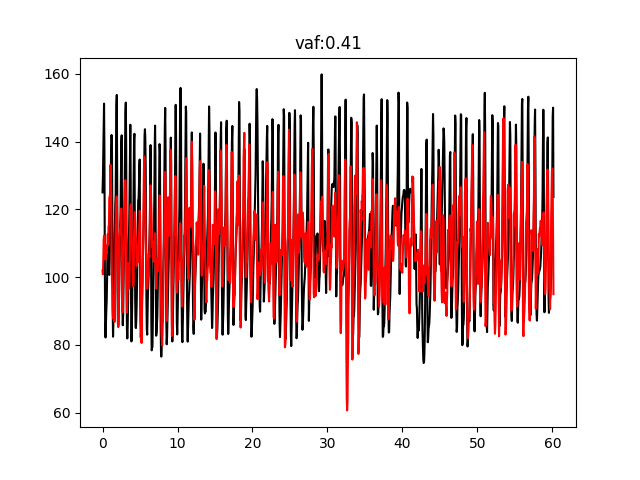

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
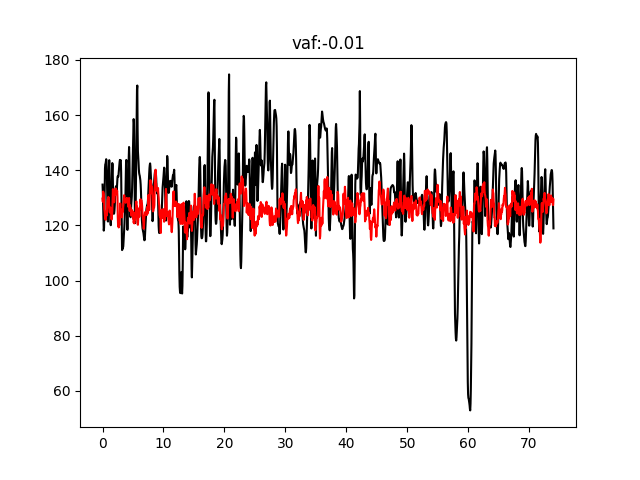

In [3]:
cp1_h, cp1_vaf, cp1_testx, cp1_testy = cp1.decode_angles()
cp2_h, cp2_vaf, cp2_testx, cp2_testy = cp2.decode_angles()

plot_wiener_filter_predic(cp1_testx, cp1_testy[:,6], cp1_h[:,6])
plot_wiener_filter_predic(cp2_testx, cp2_testy[:,6], cp2_h[:,6])
print(np.average(cp1_vaf, 1)[6])
print(np.average(cp2_vaf, 1)[6])

nada, cp2_pca_vaf, nadax, nada = cp2.decode_angles(X=cp2.apply_PCA())
temp = np.average(cp2_pca_vaf,1)[6]
print(f'num dims_{nadax.shape[1]/10}, vaf={temp}')

In [4]:
my_cca = CCAProcessor(cp1, cp2, limbfoot_angle=6, align=0)

(6084,)
(5964,)
(4083,)
(5464,)
(5284,)
should be good to align
(1450, 32)
(1450, 7)
(1450, 32)
(1450, 7)


# trying pinv decoder

In [5]:
day0_decoder = cp1_h
x = my_cca.cp2.data['rates']
y = my_cca.cp2.data['angles']

x_format, y_format = my_cca.cp2.stitch_and_format(x, y)


In [6]:
v, z = my_cca.apply_pinv_transform(x, y, day0_decoder)
x_transform = np.dot(x_format, v)
predic = np.dot(x_transform, day0_decoder)

0.07


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
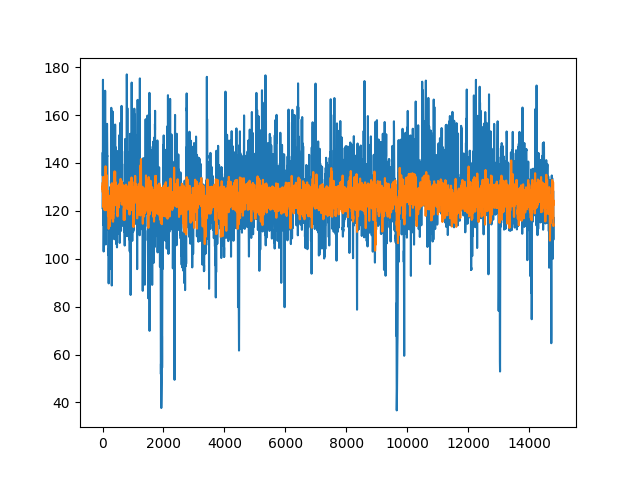

In [7]:
fig, ax = plt.subplots()
ax.plot(y_format[:,6])

ax.plot(predic[:,6]+130)
print(vaf(y_format[:,6], predic[:,6]))
